> 对线性模型的依赖对应于一个隐含的假设，即区分猫和狗的唯一要求是评估单个像素的强度。在一个倒置图像后依然保留类别的世界里，这种方法注定会失败。

我们可以在网络中加入一个或者多个隐藏层来克服线性模型的限制，多层感知机，MLP *(multilayer perceptron)*


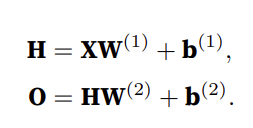
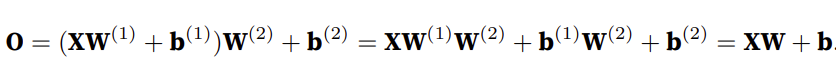
如果只是仿射变化的叠加的话，实际上没有改变性质，仍然能划归为简单仿射
> 是否说明 4 * 5可以通过变深的方式来增加参数量？

引入**激活函数**输出活性值
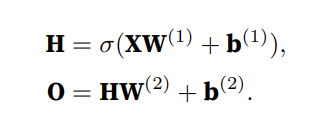


In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

### Relu函数
修正线性单元，（Rectified linear unit，ReLU）  
$ReLU(x) = max(x, 0)$

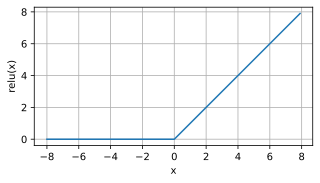

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

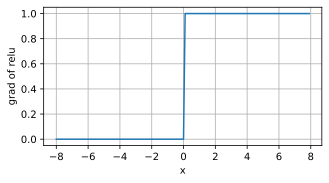

In [4]:
# 绘制函数的导数
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

特点：
求导表现好，要么是0要么是1
> 减轻了长久以来的梯度消失问题

也包括一些变体，$pReLU(x)=max(0,x) + \alpha min(0,x)$， 参数化ReLU


## sigmoid函数
也被称为挤压函数，压缩到区间（0，1）  
$sigmoid(x) = \frac{1}{1 + exp(-x)}$  

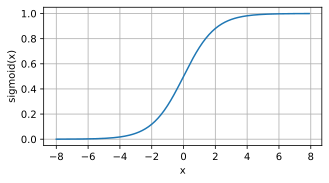

In [5]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

sigmoid 的导数 = sigmoid(x) * (1 - sigmoid(x)),0处取到峰值，为0.25

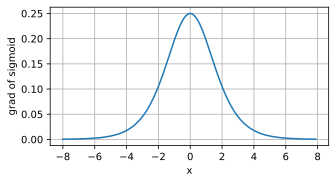

In [6]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

## tanh函数
$tanh(x) = \frac {1-exp(-2x)} {1+exp(-2x)}$  
是奇函数

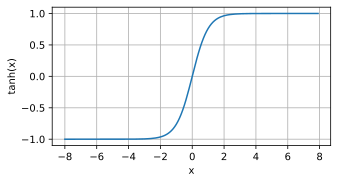

In [7]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

$\frac {d}{dx} tanh(x) = 1 - tanh^2(x)$
> 如果说这里的最大值为1有没有什么特殊之处那这么说sigmoid函数进行乘积也能得到类似的效果这是有用的吗？？能不能微调参数？



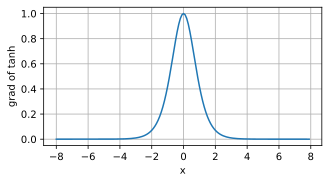

In [8]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))